In [20]:
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load csv and view the column names to check

dataframe = pd.read_csv('RP2_0046_DATA.csv')
dataframe.columns

Index([' NF ', ' LCD ', ' NucleusArea ', ' CellArea ', ' percentProtrusion ',
       ' protrusion_extent ', 'NucIntegratedH', 'logNucbyRing488 (Yap)'],
      dtype='object')

In [ ]:
#view the dataframe

dataframe.head(6)

In [3]:
#isolate the data we want to input as features/attributes

X = dataframe.iloc[:, :-1].values

#isolate the labels for YAP

y = dataframe.iloc[:, 7].values

In [5]:
#make a class where all values that are above 0 become 1. aka all positive YAP in the nucleus

y_class = np.where(y > 0, 1, y)

#make a class where all values below 0 become 0, all negative values assigned as 0 and means yap is in the cytoplasm

y_class = np.where(y_class < 0, 0, y_class)

In [6]:
#get rid of floats, change to int

y_class = y_class.astype(int)
y_class

array([1, 1, 1, ..., 1, 1, 1])

In [7]:
#split the model to have 80% of the data as a training set and 20% as a test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.20)

In [8]:
#normalise and scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#build the KNN classifier with the optimum 23 K's

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=23)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [10]:
#save predictions for analysis

y23_pred = classifier.predict(X_test)

In [11]:
#calculate f1 score for evaulation

from sklearn.metrics import f1_score
f1_score(y_test, y23_pred, average='weighted')

0.8069103381226994

In [12]:
#calculate accuracy score

classifier.score(X_test, y_test, sample_weight=None)

0.8139634801288936

In [13]:
#print a confusion matrix to understand model effectiveness

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y23_pred))
print(classification_report(y_test, y23_pred))

[[ 645  550]
 [ 316 3144]]
              precision    recall  f1-score   support

           0       0.67      0.54      0.60      1195
           1       0.85      0.91      0.88      3460

    accuracy                           0.81      4655
   macro avg       0.76      0.72      0.74      4655
weighted avg       0.80      0.81      0.81      4655



In [14]:
#feature importance analysis 

import eli5
from eli5.sklearn import PermutationImportance
model = PermutationImportance(classifier)
model.fit(X_train,y_train)
eli5.show_weights(model, feature_names = [' NF ', ' LCD ', ' NucleusArea ', ' CellArea ', ' percentProtrusion ',
       ' protrusion_extent ', 'NucIntegratedH'])

Weight,Feature
0.1118 ± 0.0026,LCD
0.0293 ± 0.0025,NucleusArea
0.0228 ± 0.0006,CellArea
0.0194 ± 0.0037,NF
0.0142 ± 0.0030,protrusion_extent
0.0130 ± 0.0022,NucIntegratedH
0.0105 ± 0.0034,percentProtrusion


Text(91.68, 0.5, 'Predicted Class')

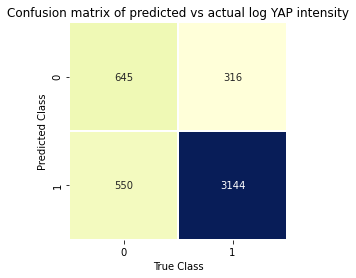

In [23]:
#plot heatmap to show accuracy of model 

import seaborn as sns
matrix_data = confusion_matrix(y_test, y23_pred)
sns.heatmap(matrix_data.T, square=True, annot=True, fmt='d', cbar=False, linewidths=.5, cmap="YlGnBu")
plt.title('Confusion matrix of predicted vs actual log YAP intensity')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')